In [1]:
!pip install git+https://github.com/a-r-r-o-w/diffusers.git@re-animatediff-sdxl transformers accelerate

  Cloning https://github.com/a-r-r-o-w/diffusers.git (to revision re-animatediff-sdxl) to /tmp/pip-req-build-amkaf5s6
  Running command git clone --filter=blob:none --quiet https://github.com/a-r-r-o-w/diffusers.git /tmp/pip-req-build-amkaf5s6
  Running command git checkout -b re-animatediff-sdxl --track origin/re-animatediff-sdxl
  Switched to a new branch 're-animatediff-sdxl'
  Branch 're-animatediff-sdxl' set up to track remote branch 're-animatediff-sdxl' from 'origin'.
  Resolved https://github.com/a-r-r-o-w/diffusers.git to commit c01d2c29dffbd75524fa6a3437be91563db1b659
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.26.0.dev0-py3-none-any.whl size=1914088 sha256=c8bfda8c7899c3a71411a6bfc9eebb1b9a0f6d2e82fe09bda24446a0bcaef797
  Stored in directory: /tmp/pip-ephem-wheel-cache-it288ngd/wheels/56/99/44/1c50d6a2d5bd4118288c545e8a427630e6750a550

In [1]:
import torch
from diffusers import (
    AnimateDiffPipeline,
    DDIMScheduler,
    EulerDiscreteScheduler,
    DEISMultistepScheduler,
)
from diffusers.models import MotionAdapter
from diffusers import AnimateDiffSDXLPipeline

In [2]:
adapter = MotionAdapter.from_pretrained(
    "a-r-r-o-w/animatediff-motion-adapter-sdxl-beta", torch_dtype=torch.float16
)

In [3]:
# model_id = "stabilityai/stable-diffusion-xl-base-1.0"
# model_id = "stablediffusionapi/dynavision-xl-v0610"
model_id = "Lykon/dreamshaper-xl-1-0"

# scheduler = EulerDiscreteScheduler.from_pretrained(
# scheduler = DEISMultistepScheduler.from_pretrained(
scheduler = DDIMScheduler.from_pretrained(
    model_id,
    subfolder="scheduler",
    clip_sample=False,
    timestep_spacing="linspace",
    beta_schedule="linear",
    steps_offset=1,
)
pipe = AnimateDiffSDXLPipeline.from_pretrained(
    model_id,
    motion_adapter=adapter,
    scheduler=scheduler,
    torch_dtype=torch.float16,
    variant="fp16",
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'center_input_sample': False, 'mid_block_type': 'UNetMidBlockCrossAttnMotion', 'only_cross_attention': False, 'attention_head_dim': [5, 10, 20], 'dual_cross_attention': False, 'class_embed_type': None, 'num_class_embeds': None, 'upcast_attention': None, 'resnet_time_scale_shift': 'default', 'resnet_skip_time_act': False, 'resnet_out_scale_factor': 1.0, 'time_embedding_type': 'positional', 'time_embedding_dim': None, 'time_embedding_act_fn': None, 'timestep_post_act': None, 'time_cond_proj_dim': None, 'attention_type': 'default', 'class_embeddings_concat': False, 'mid_block_only_cross_attention': None, 'cross_attention_norm': None} were passed to UNetMotionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [4]:
pipe.enable_vae_slicing()
pipe.enable_vae_tiling()

In [26]:
result = pipe(
    prompt="a panda surfing in the ocean, realistic, hyperrealism, high quality",
    negative_prompt="low quality, worst quality",
    num_inference_steps=20,
    guidance_scale=8,
    width=1024,
    height=1024,
    num_frames=16,
)

  0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
from diffusers.utils import export_to_gif
from IPython.display import Image as displayImage

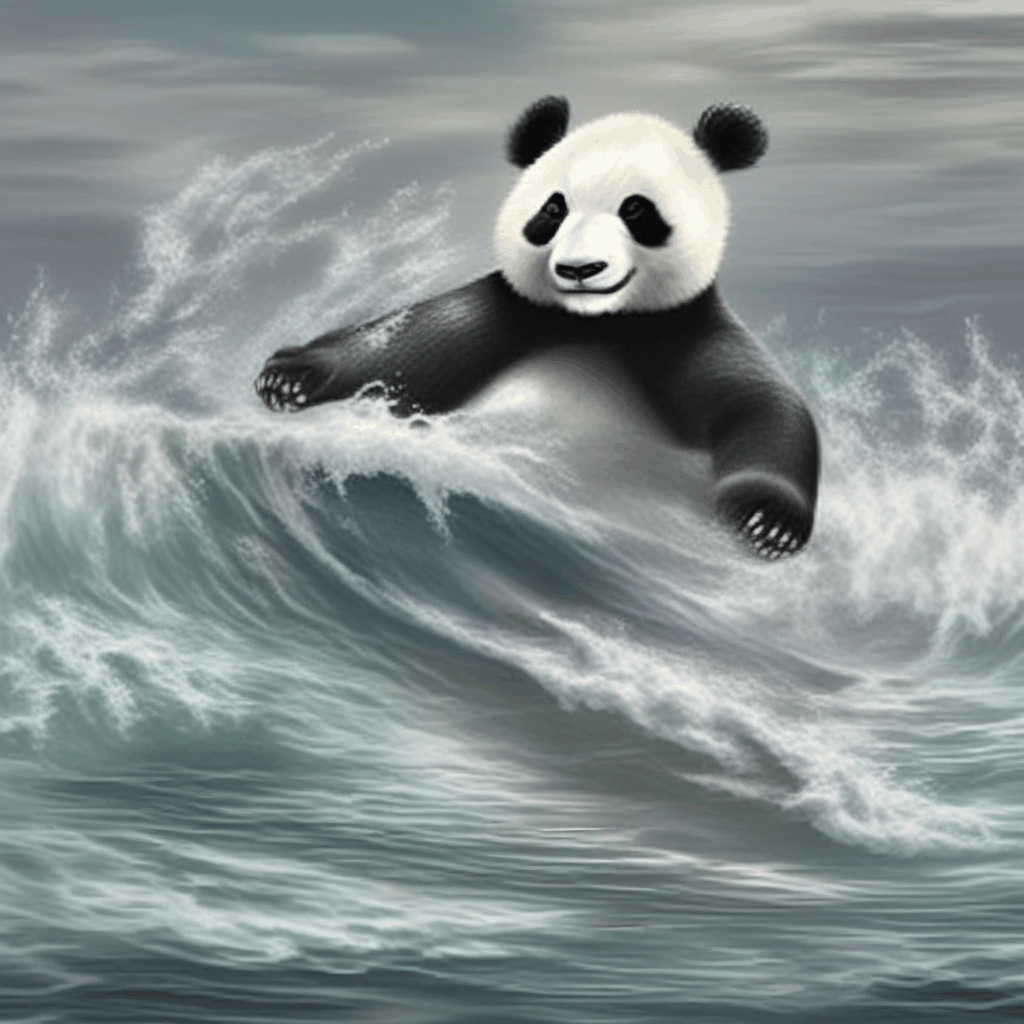

In [27]:
export_to_gif(result.frames[0], "animation.gif")
displayImage("animation.gif", embed=True)

In [12]:
# prompts = [
#     "A panda standing on a surfboard in the ocean in sunset, 4k, high resolution.Realistic, Cinematic, high resolution",
#     "An astronaut, floating in space, lost in a galaxy, nebulae, realistic, high quality",
# ] # original sdxl

prompts = [
    "photo of a supercar, 8k uhd, high quality, road, sunset, motion blur, depth blur, cinematic, filmic image 4k, 8k. Natural sunlight, vibrant color, reflections",
    "light house, overlooking the sea, beautiful colors, realistic, high quality, high definition",
]  # dreamshaper xl

# prompts = [
#     "cinematic color grading lighting vintage realistic film grain scratches celluloid analog cool shadows warm highlights soft focus actor directed cinematography technicolor , confused, looking around scared , + / A lanky blonde haired man on vacation enjoying the local party scene in Brisbane at dawn",
#     "Pixel Art pixelated pixel pixel , extremely content happy smile , + / A fit pink haired woman at night in the city, holding a trick or treat bag, wearing a kitty ears halloween costume, (big eyes:1.3) by Dreamworks Studios",
#     "anime artwork of [water|a galaxy|thunderstorm] inside a bottle",
# ] # dynavision

negative_prompt = "painting, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, deformed, ugly, blurry, bad anatomy, bad proportions, extra limbs, cloned face, skinny, glitchy, double torso, extra arms, extra hands, mangled fingers, missing lips, ugly face, distorted face, extra legs, anime"

In [13]:
for index, prompt in enumerate(prompts):
    if index == 0:
        continue
    output = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=20,
        guidance_scale=10,
        width=1024,
        height=1024,
        num_frames=16,
    )
    export_to_gif(output.frames[0], f"{model_id.split('/')[1]}-{index}.gif")

  0%|          | 0/20 [00:00<?, ?it/s]